<a href="https://colab.research.google.com/github/aditi2259/infosys_internship/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df2=pd.read_csv('/content/2.02.Binarypredictors.csv')
df2.head()

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male


In [ ]:
df2['Admitted'] = df2['Admitted'].map({'Yes':1,'No':0})
x1=df2['SAT']
y=df2['Admitted']

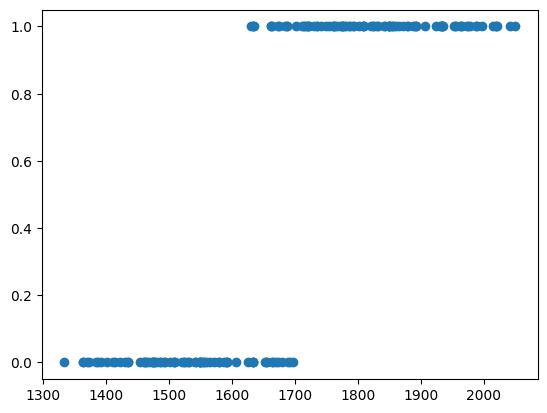

In [ ]:
plt.scatter(x1,y)
plt.show()

In [ ]:
import statsmodels.api as sm
x=sm.add_constant(x1)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Admitted   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     357.5
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           2.98e-43
Time:                        14:27:11   Log-Likelihood:                -24.262
No. Observations:                 168   AIC:                             52.52
Df Residuals:                     166   BIC:                             58.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2519      0.203    -16.038      0.000      -3.652      -2.852
SAT            0.0022      0.000     18.907      0.000       0.002       0.002
==============================================================================
Omnibus:                        7.929   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.844
Skew:                           0.090   Prob(JB):                        0.146
Kurtosis:                       2.281   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-19-a5539b4bee1f>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yhat = model.params[0] + model.params[1]*x1


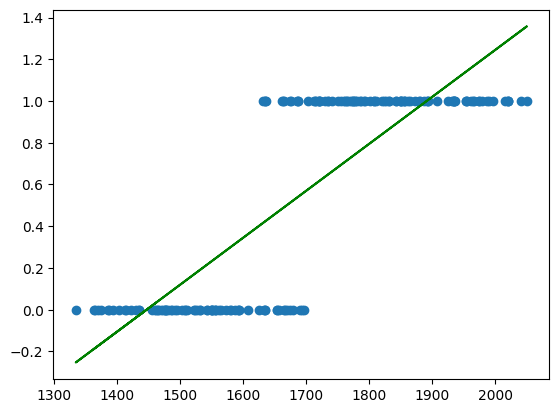

In [ ]:
yhat = model.params[0] + model.params[1]*x1
plt.scatter(x1,y)
plt.plot(x1,yhat,c = 'g')
plt.show()

In [ ]:
#logistic Regression
model=sm.Logit(y,x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 05 Dec 2024   Pseudo R-squ.:                  0.7992
Time:                        14:28:00   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
def func(x,b0,b1):
  return np.array(np.exp(b0+b1*x)/(1+np.exp(b0+b1*x)))


In [ ]:
yhat=np.sort(func(x1,model.params[0],model.params[1]))
x_=np.sort(np.array(x1))

<ipython-input-22-4ff1131d492f>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yhat=np.sort(func(x1,model.params[0],model.params[1]))


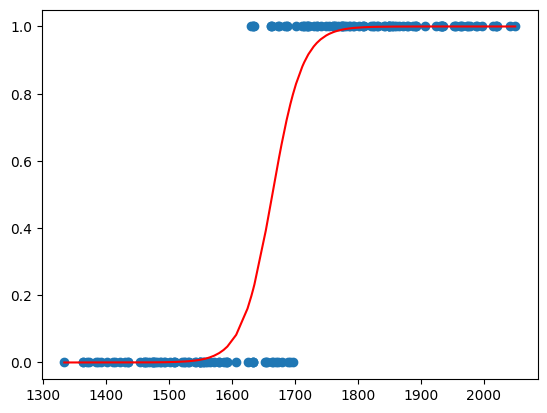

In [ ]:
plt.scatter(x1,y)
plt.plot(x_,yhat,c = 'r')
plt.show()